   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.9/131.9 kB 4.7 MB/s eta 0:00:00


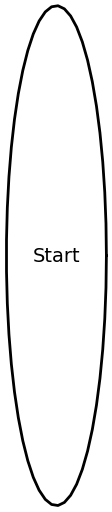

In [2]:
# For today example: (https://schemdraw.readthedocs.io/en/latest/index.html)
# !pip install schemdraw

# Now that the external librariy is installed 
from schemdraw import Drawing
from schemdraw.flow import Start, Arrow, Box, Ellipse, Decision

# This library draws for us flowchart elements e.g. Start, Arrow, Box, Ellipse, Decision
# Try a few yourself! Here one:
Ellipse(h=10, w = 2).label('Start')

# Note that Ellipse is a class that takes h and w as inputs. Note that this class has label() as a function.
# You can see what are the attributed and arguments of a class and function with your local IDE

# More NOTES:
# This plotting works only on jupyter notebook. If you want to see it from a normal python program it is a bit
# less direct (power of jupyter notebook!!). Your will have to write
# d = Drawing() 
# d += Ellipse(h=10, w = 2).label('Start')
# d.draw()


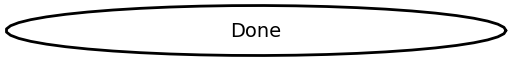

In [3]:
# Another one
Ellipse(w=10, h=1).label('Done')


In [4]:
# Ok, let's draw a flochart now! First let's make the object that we fancy.

start = Ellipse().label('Start')

# Note that in python the function label can be called at different times
box_yes = Box().label('Eat \n Dark Chocolate')
box_no = Box().label('Eat \n White Chocolate')
box_maybe = Box().label('Eat \n Any Chocolate')

decision = Decision(S='Maybe', E='Yes', W='No').label('Do \n you know \n the meaning \n of life?')

end = Ellipse().label('Done')

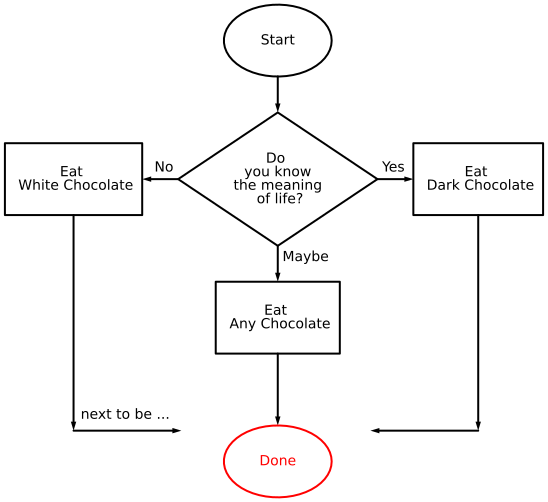

In [5]:
# ok, the objects are ready, let's make a drawing now! 

canvas = Drawing() 

start = Ellipse().label('Start')
canvas += start
canvas += Arrow().down(1).at(start.S)
# You might ask, how could I possible know the functions .down() and .at() 
# Imagine you are new to this library, as most people would be.
# You can read the manual, use stackoverflow (or google), check for exaxmples online or use your IDE and 
# try the different options. This is a good moment to remember that python should use descriptive variables,
# so that you have a good guess what a function/variable could do without even read any manual.
# Can you guess what each line is doing in this program without go up to check what contains?
canvas += decision 
canvas += Arrow().right(1).at(decision.E)
canvas += box_yes
canvas += Arrow().left(1).at(decision.W)
canvas += box_no
canvas += Arrow().down(1).at(decision.S)
canvas += box_maybe
canvas += Arrow().down(6).at(box_yes.S)

canvas += Arrow().left(3)
canvas += Arrow().down(6).at(box_no.S)
canvas += Arrow().right(3).label('next to be ... ')
canvas += Arrow().down(2).at(box_maybe.S)
canvas += end.color('red')

# NB. This plotting works only on jupyter notebook, if you use something else try d1.draw() 
# replacing the following line:
canvas

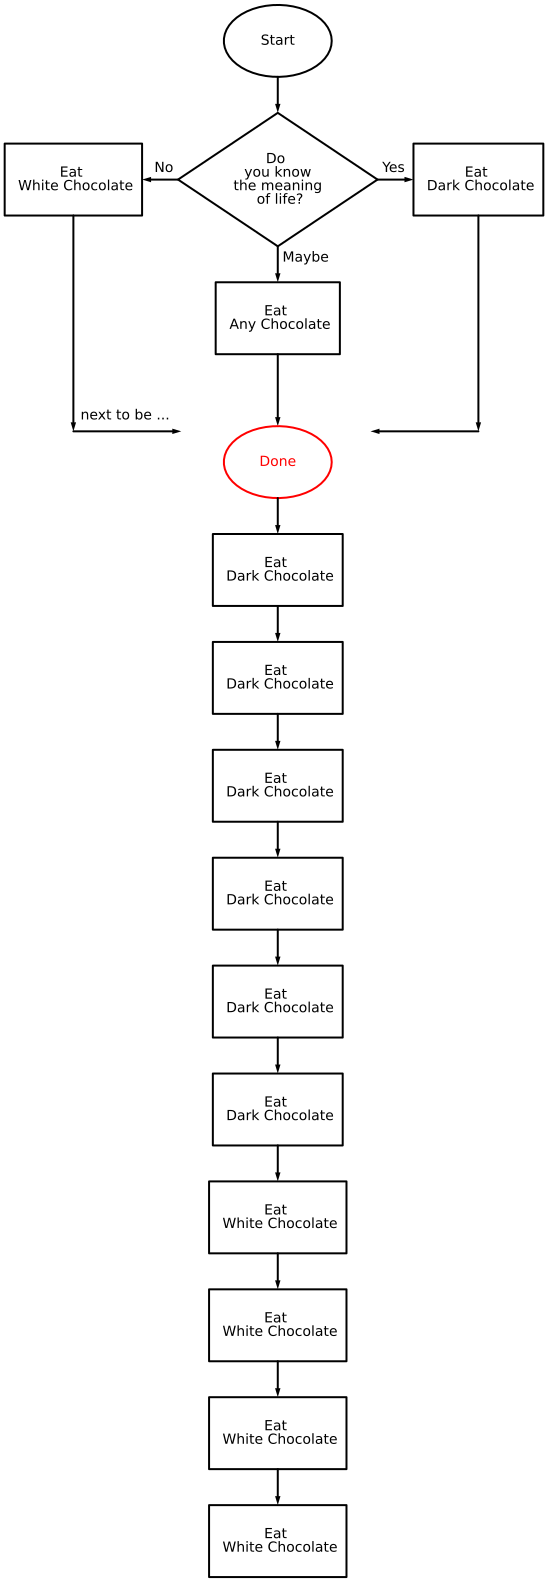

In [6]:
for i in range(10):
    if i > 5:
        canvas += Arrow().down(1)
        canvas += Box().label(f'Eat \n White Chocolate')
    else:
        canvas += Arrow().down(1)
        canvas += Box().label(f'Eat \n Dark Chocolate')
        
canvas

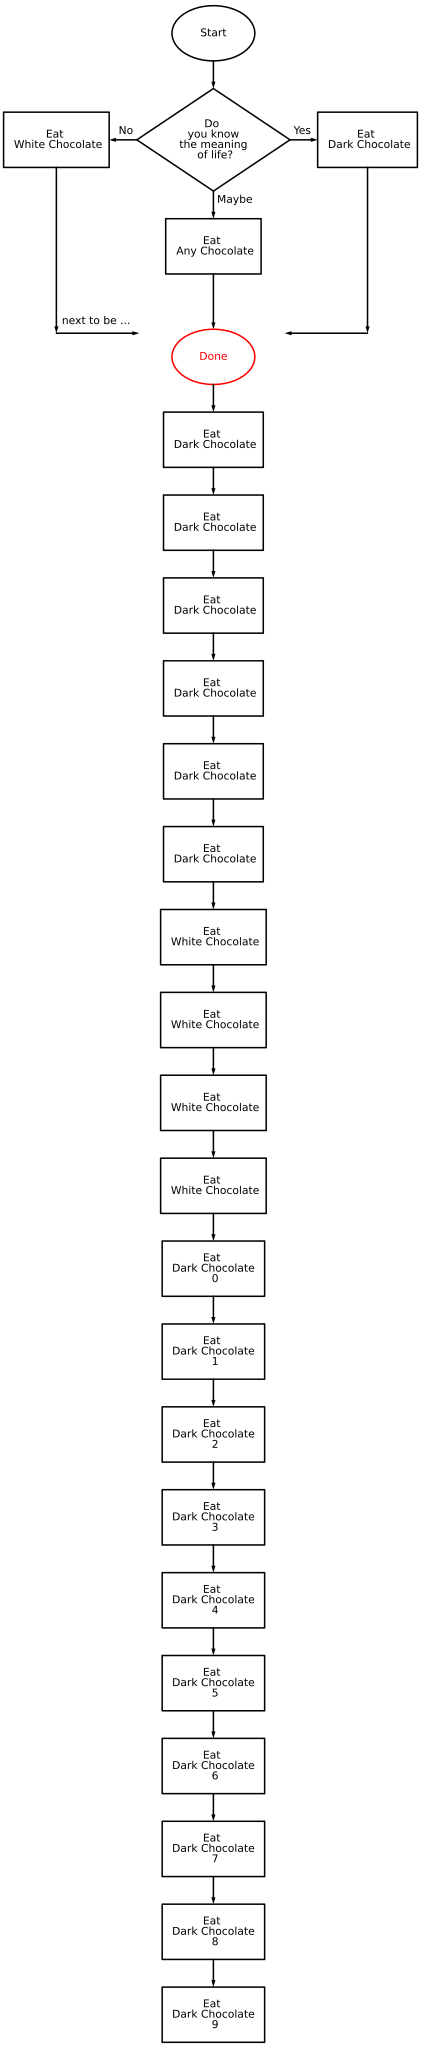

In [7]:
for i in range(10):
    canvas += Arrow().down(1)
    canvas += Box().label(f'Eat \n Dark Chocolate \n {i}')
canvas

In [8]:
# Create a function! 
decision = Decision(S='Maybe', E='Yes', W='No').label('Do \n you know \n the meaning \n of life?')
def create_base_plot():
   
    canvas = Drawing() 

    canvas += start
    canvas += Arrow().down(1).at(start.S)
    canvas += decision 
    canvas += Arrow().right(1).at(decision.E)
    canvas += box_yes
    canvas += Arrow().left(1).at(decision.W)
    canvas += box_no
    canvas += Arrow().down(1).at(decision.S)
    canvas += box_maybe
    canvas += Arrow().down(6).at(box_yes.S)

    canvas += Arrow().left(3)
    canvas += Arrow().down(6).at(box_no.S)
    canvas += Arrow().right(3).label('next to be ... ')
    canvas += Arrow().down(2).at(box_maybe.S)
    canvas += end.color('red')
    return canvas


In [9]:
def get_something(an_object):
    an_object = 2 
    print(f'Inside function {an_object}')
    return an_object

variable = 'franko'
a = get_something(variable)

a

Inside function 2


2

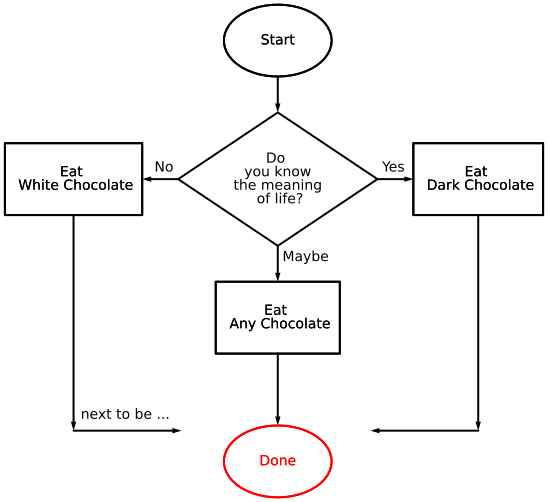

In [10]:
new_canvas = create_base_plot()
new_canvas

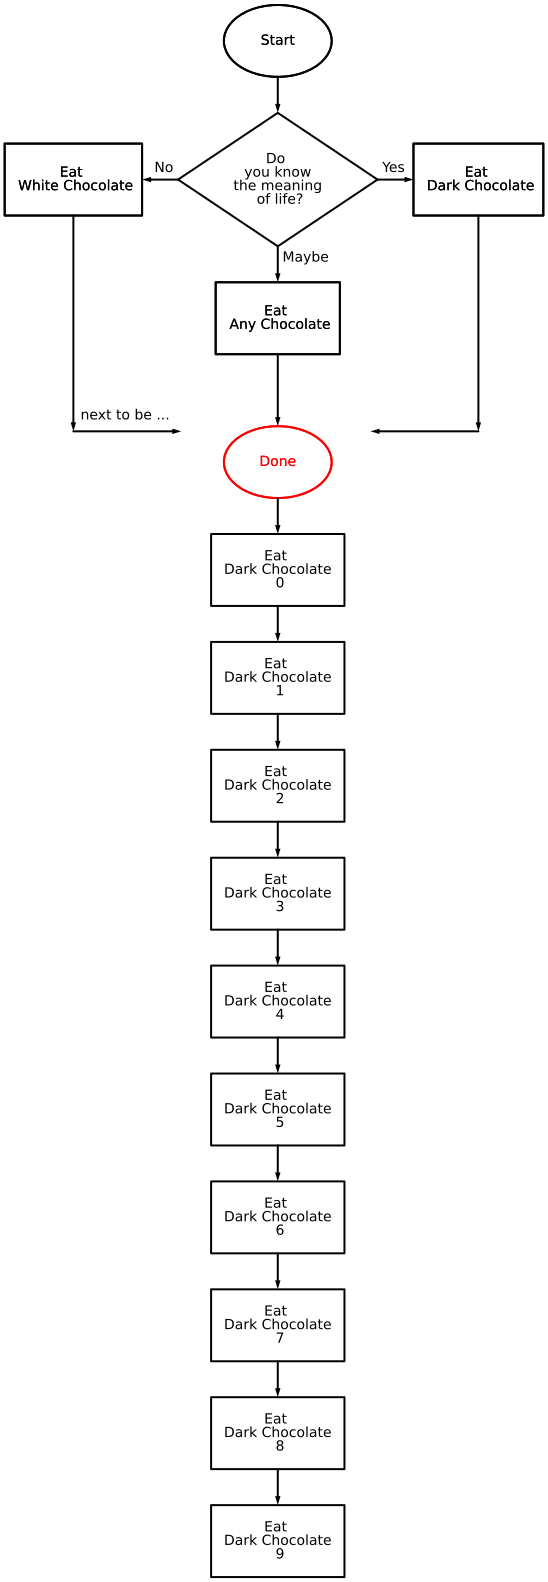

In [11]:
for i in range(10):
    new_canvas += Arrow().down(1)
    new_canvas += Box().label(f'Eat \n Dark Chocolate \n {i}')
new_canvas

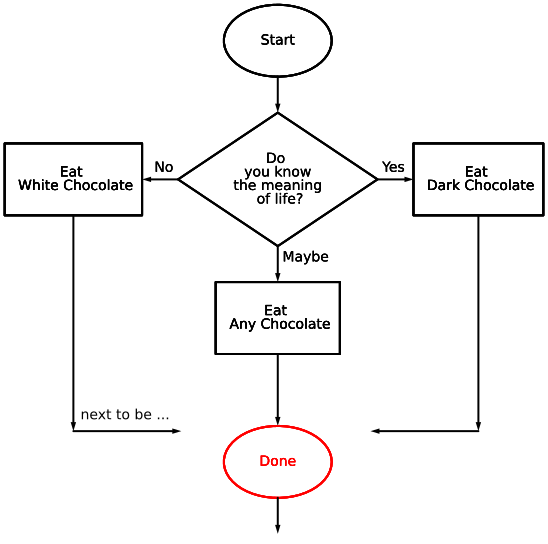

In [12]:
# what more? Objects!
really_new_canvas = create_base_plot()
absolutely_new_canvas = create_base_plot()

even_more_newest_canvas = really_new_canvas
even_more_newest_canvas += Arrow().down(1)
even_more_newest_canvas

In [13]:
# Let me show you a problem
even_more_newest_canvas += absolutely_new_canvas

AttributeError: 'Drawing' has no attribute _place

In [14]:
# This is a good moment to use... CLASSES!
class My_drawing_class:
    def __init__(self, description='Class-ik', something_more='None', size=1):
        print(description)
        self.more_info = something_more
        self.canvas = Drawing() 
        self.size = size
        self.elements = 0 
        self.bad_boy = 'NaN'
        self.banana = 178
                
    def make_the_basic_one(self):
        self.canvas = create_base_plot()
        self.elements = 6 
        
    def add_arrows_down(self, give_me_more=2):
        for _ in range(give_me_more):
            self.canvas += Arrow().down(self.size)
        self.elements += give_me_more
        
    def add_arrow_right(self, give_me_more=2):
        for _ in range(give_me_more):
            self.canvas += Arrow().right(self.size)
        self.elements += give_me_more
        
    def add_arrow(self, direction, give_me_more=1):
        if direction == 'down':
            self.add_arrows_down(give_me_more)
        elif direction == 'right':
            self.add_arrows_right(give_me_more)
        else: 
            raise NotImplementedError('Why are you doing this to me?? ')  
            
    def plot_me(self):
        return self.canvas.draw()
         
    def __str__(self):
        return f'I am a pretty pretty class with {self.elements} elements, {self.more_info}'


In [15]:
look_at_me = My_drawing_class(description='No-ik', something_more='More') 

look_at_me.add_arrow(direction='down')

print(look_at_me)

No-ik
I am a pretty pretty class with 1 elements, More


In [16]:

look_at_me_again = My_drawing_class()

print(look_at_me_again)

Class-ik
I am a pretty pretty class with 0 elements, None


In [17]:
look_at_me.plot_me()

In [18]:
canvas = Drawing() 
canvas += Arrow().down(10)
canvas += Arrow().down(1)
canvas.draw()

In [19]:
look_at_me_again = My_drawing_class()

look_at_me_again.make_the_basic_one()
look_at_me_again.canvas.draw()
print(look_at_me_again)

Class-ik
I am a pretty pretty class with 6 elements, None


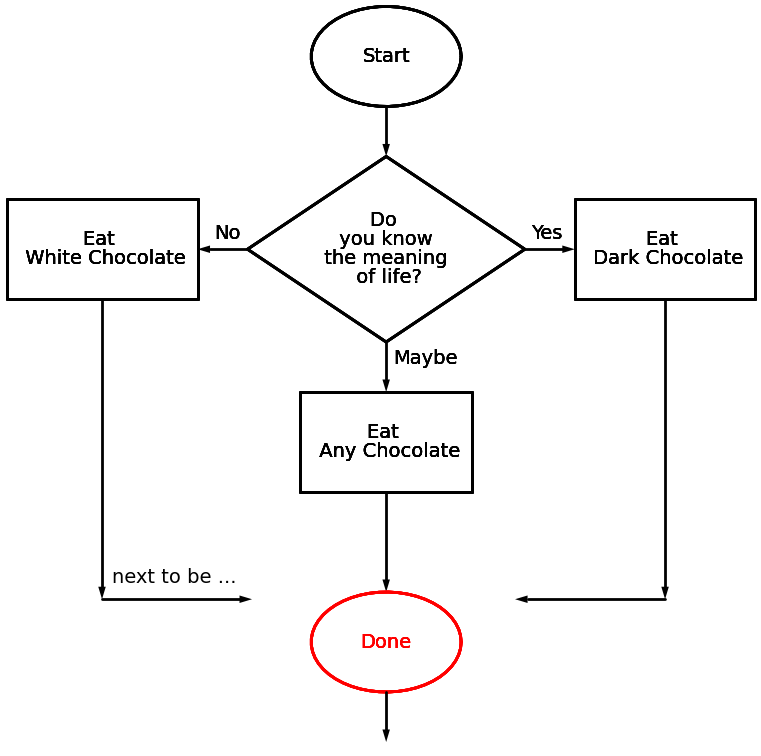

In [20]:
look_at_me_again.add_arrow('down')
look_at_me_again.plot_me()

In [21]:
look_at_me_again.add_arrow('DIE!')

NotImplementedError: Why are you doing this to me?? 